# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 5 Simple Perceptron
## **Review** ##
Before we start, let's have a quick recap of the lecture.


## __Simple Perceptron__ ##

The perceptron is a simple model of a biological neuron. The image below shows the similarity between perceptrons and biological neurons in structure:

##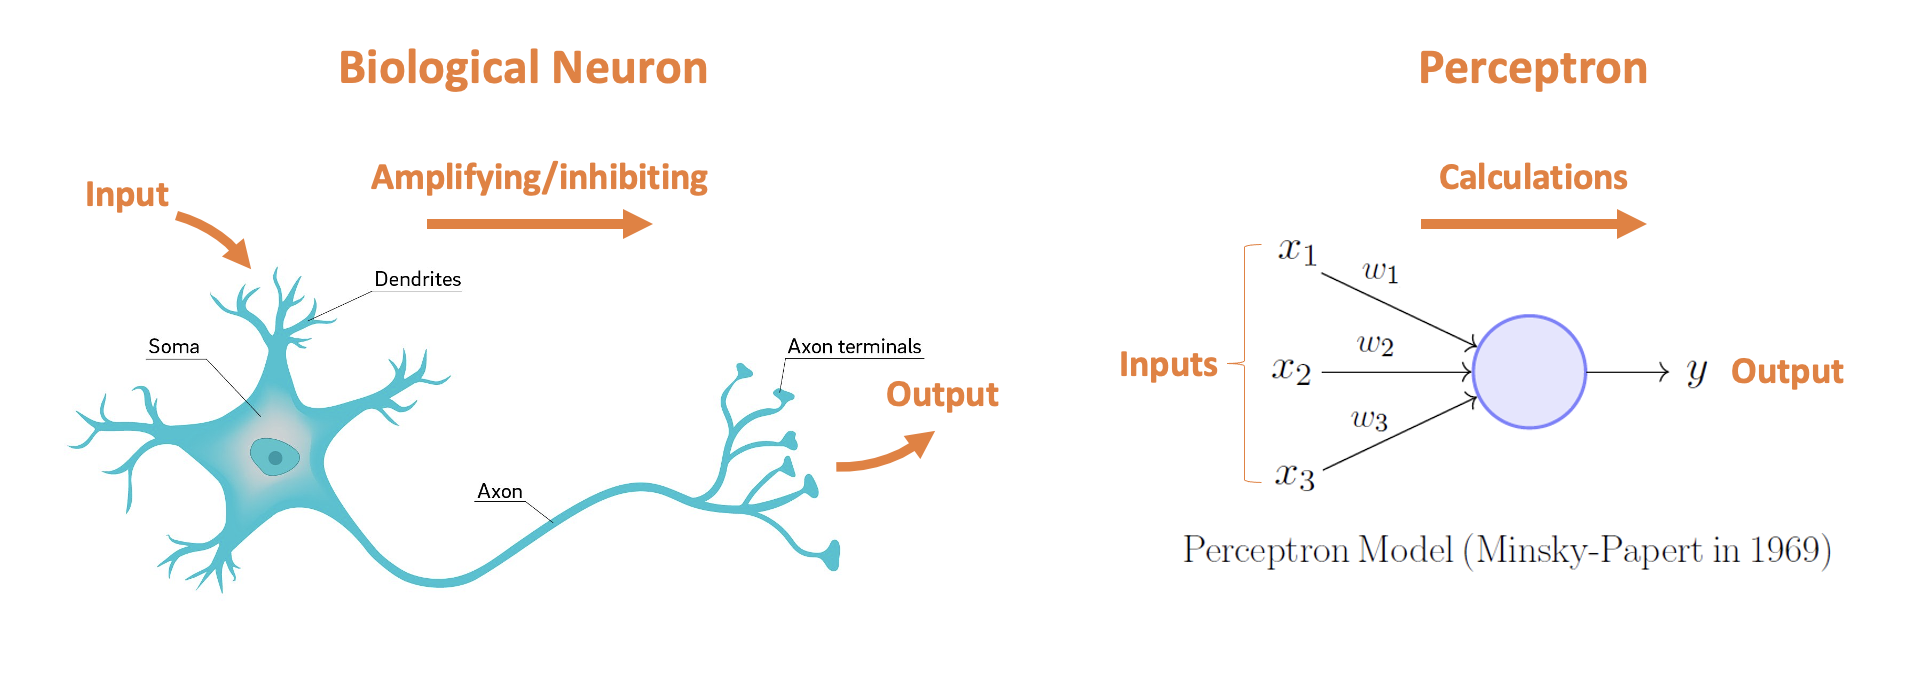

The perceptron and biological neuron also share similarities in function.

**How does a biological neuron work?**
1. Neurons are the fundamental units of the nervous system.
2. A neuron receives inputs (action potentials).
3. The neuron can then amplify or inhibit the action potentials to perform a certain body function.
4. The processed action potential is the neuron's output.

**How does the perceptron work?**

1. The perceptron receives inputs (features).
2. The perceptron performs calculations on the features.
3. The result of the calculations is the output of the perceptron.

**Why are perceptrons useful in machine learning?**
* The calculations of the perceptron can be optimized to make a prediction.
* The calculations are optimized by choosing an appropriate **activation function** and updating the **weights** accordingly.



## __Response and Activation Function__

In a simple perceptron, it aggregates all inputs ($x_1, x_2, \ldots, x_n$) with the corresponding weights ($w_1, w_2, \ldots, w_n$) and applies bias ($\theta$).
>$Y(x_{1}, x_{2}, ...,x_{n}) = \sum_{i=1}^n(w_{i} \times x_{i}) + \theta$.

In this function, the $w_1, w_2, \ldots, w_n$, and $\theta$ are all trainable parameters, which will be updated through a training process.

After getting the value Y, we need to use an activation function, $f$, to judge the response. There are many different types of activation function. Here we use a simple **binary step** function:
>$response = f(Y) = 1 $  for  $Y>0$<br/>
>$response = f(Y) = 0 $  for  $Y\leq0$





## __Updating Weights__

**How does a perceptron "learn"?**

As mentioned, the function has trainable parameters $w_1, w_2, \ldots, w_n$ and $\theta$. So what we will do is update those initialized trainable parameters when we go through the data samples in the dataset.

For every data sample in the dataset:
>Compute $f(Y(x_{1}, x_{2}, ...,x_{n}))$ <br/>
>Check if $f(Y)==T$, where $T$ is the true label for the data sample.<br/>
>If yes, $w_1, w_2, \ldots, w_n$, and $\theta$ stay unchanged.<br/>
>If not, $w_1, w_2, \ldots, w_n$, and $\theta$ will be updated according to the following rules such that the output of the perceptron for the new weights is closer to the true label.<br/>
>>1. $w_1, w_2, \ldots, w_n$ will be updated according to the value of input $x_1, x_2, \ldots, x_n$ and output difference $T-f(Y)$. <br>
$\Delta w_i=\eta (T-f(Y))\cdot x_i$
>>2. $\theta$ will be updated according to the value of the output difference $T-f(Y)$. <br>
$\Delta \theta=\eta (T-f(Y))$

The number that controls how much the weights change is called the $learning$ $rate$, denoted as $\eta$.

The number of times we go through all training data samples is called $epochs$.

Chosen $learning$ $rate$ and $max$ $epochs$ are important as they influence the final performance and training time.





## __Stopping Criteria__

The previous section describes how the perceptron learns.
**When does a perceptron stop learning** so that we can use it to make predictions?

Here are several options for stopping criteria:

*   Stop when meeting $max$ $training$ $time$. We can set a time limit for the training process.
*   Stop when meeting $max$ $epochs$. We can set the maximum number of rounds the training process can run.
*   Stop when the $error$ is low enough. We can check the average error after each epoch. If the error is lower than a certain number, stop the training process.
*   Stop when $accuracy$ is high enough. Similar to the above, we can count the accuracy level after each epoch. If the accuracy exceeds a certain number, stop the training process.
*   Stop when $weights$ do not update or update little. We can check the change of weights in each epoch. If the change is little, stop the training process.

The main idea behind stopping criteria is not to waste too much time on little improvement.

## __Limitations__

As a simple binary classification model, perceptron has its drawbacks and problems.

### Perceptron is not suitable for non-linear problems.

A perceptron model is like a straight line in the multi-dimensional space that can separate data samples based on their label.

If a line cannot separate the data samples, then a simple perceptron cannot classify the dataset. But it's possible to transform the non-linear problem into a linear problem, such as through a polynomial transform.

### Perceptrons are easily influenced by data distribution.

In binary classification, simple perceptron suffers from data imbalance and insufficient data. In these situations, it becomes easy to produce results like __all 0s__ or __all 1s__.

## __Examples__

The following shows examples of how the Perceptron model is used to classify different datasets.


### __Example 1: Good application of Perceptron__

This dataset contains **equal numbers of each class** and the data is **linearly separable**.

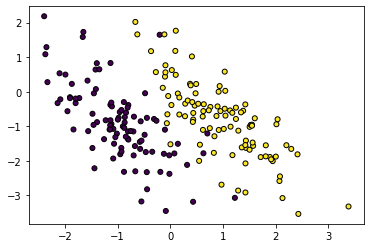

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Traditional 2-class data
X1, y1 = datasets.make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1
)

# Plot the points in the dataset
plt.scatter(X1[:,0],X1[:,1],marker='o',c=y1,s=25,edgecolors="k")

plt.show()

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np

# Fit a perceptron model for the data above
input=X1
output=y1
model=Perceptron()
model.fit(input,output)


Perceptron()

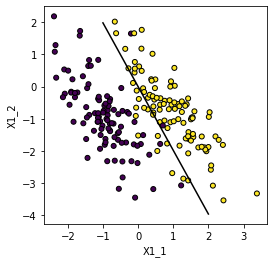

In [ ]:
# Get the decision line from the perceptron model
ymin, ymax = -1,2
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the decision boundary
plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.scatter(X1[:,0],X1[:,1],marker='o',c=y1,s=25,edgecolors="k")
plt.plot(xx, yy, 'k-')
ax.set_xlabel('X1_1')
ax.set_ylabel('X1_2')
plt.show()

### __Example 2: Bad application of Perceptron__

The data is **not linearly separable** based on the two features.

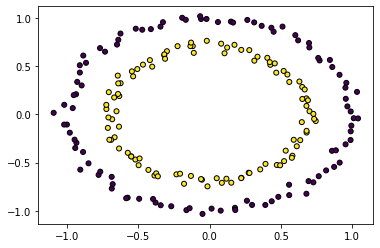

In [ ]:
# Circle 2-class data
X2, y2 = datasets.make_circles(n_samples=200, noise=0.03, factor=0.7)

plt.scatter(X2[:,0],X2[:,1],marker='o',c=y2,s=25,edgecolors="k")

plt.show()

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np

# Fit a perceptron model for the data above
input=X2
output=y2
model2=Perceptron()
model2.fit(input,output)

Perceptron()

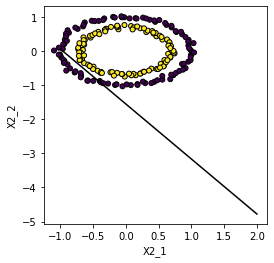

In [ ]:
# Get the decision line from the perceptron model
ymin, ymax = -1,2
w = model2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (model2.intercept_[0]) / w[1]

# Plot the decision boundary
plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.scatter(X2[:,0],X2[:,1],marker='o',c=y2,s=25,edgecolors="k")
plt.plot(xx, yy, 'k-')
ax.set_xlabel('X2_1')
ax.set_ylabel('X2_2')
plt.show()

### __Example 3: Bad application of Perceptron__

There is more data from one class than the other (class imbalance).

3
197


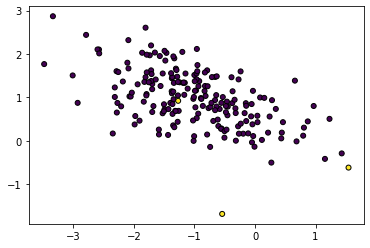

In [ ]:
# Imbalance 2-class data
X3, y3 = datasets.make_classification(
    n_features=5,
    n_classes=2,
    n_samples=200,
    n_clusters_per_class=1,
    weights=[0.99]
)

print(sum(y3==1))
print(sum(y3==0))
# Plot the points in data
plt.scatter(X3[:,0],X3[:,1],marker='o',c=y3,s=25,edgecolors="k")

plt.show()

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np

# Fit a perceptron model for the data above
input=X3
output=y3
model3=Perceptron()
model3.fit(input,output)

Perceptron()

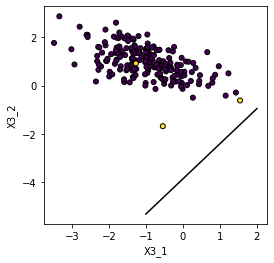

In [ ]:
# Get the decision line from the perceptron model
ymin, ymax = -1,2
w = model3.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (model3.intercept_[0]) / w[1]

# Plot the decision boundary
plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.scatter(X3[:,0],X3[:,1],marker='o',c=y3,s=25,edgecolors="k")
plt.plot(xx, yy, 'k-')
ax.set_xlabel('X3_1')
ax.set_ylabel('X3_2')
plt.show()